<a href="https://colab.research.google.com/github/Akanksha-cell-max/Advanced-Artificial-Intelligence/blob/main/SD%26L4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


✅ Dataset Loaded Successfully:
   cgpa  package
0  6.89     3.26
1  5.12     1.98
2  7.82     3.25
3  7.42     3.67
4  6.94     3.57

Missing Values:
 cgpa       0
package    0
dtype: int64


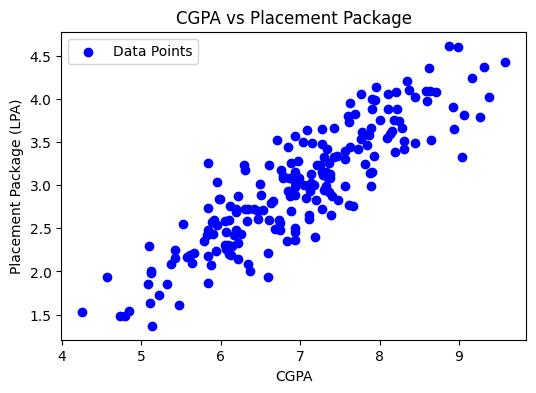


=================== Model Evaluation ===================

📊 Underfitting (Linear)
Train R² Score: 0.776
Test R² Score:  0.773
Train RMSE:     0.336
Test RMSE:      0.290

📊 Good Fit (Poly Deg 2)
Train R² Score: 0.776
Test R² Score:  0.775
Train RMSE:     0.335
Test RMSE:      0.289

📊 Overfitting (Poly Deg 10)
Train R² Score: 0.786
Test R² Score:  0.629
Train RMSE:     0.328
Test RMSE:      0.371


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


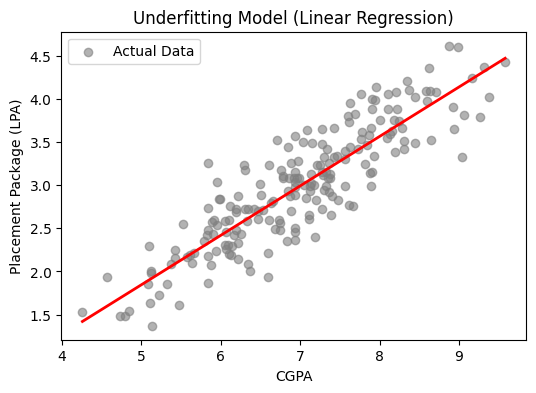

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


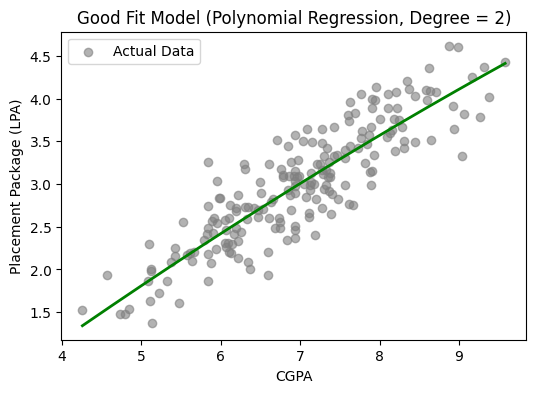

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


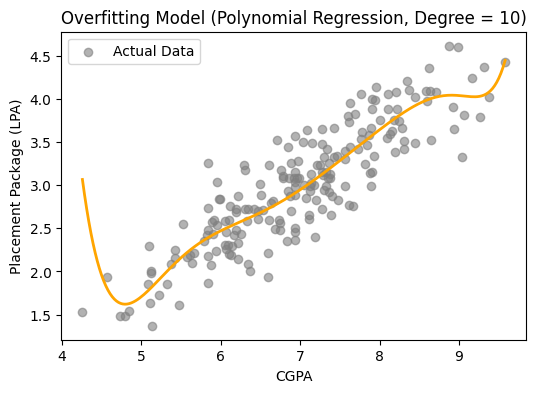

In [6]:
# =========================================================
# ANALYZING UNDERFITTING, GOOD FIT, AND OVERFITTING
# =========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

# =========================================================
# STEP 1: Load Dataset
# =========================================================

file_path = "/content/placement.csv"   # <-- Change to your dataset path
df = pd.read_csv(file_path)

print("\n✅ Dataset Loaded Successfully:")
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# =========================================================
# STEP 2: Visualize Data
# =========================================================

plt.figure(figsize=(6, 4))
plt.scatter(df['cgpa'], df['package'], color='blue', label='Data Points')
plt.xlabel('CGPA')
plt.ylabel('Placement Package (LPA)')
plt.title('CGPA vs Placement Package')
plt.legend()
plt.show()

# =========================================================
# STEP 3: Prepare Data
# =========================================================

X = df[['cgpa']]
y = df['package']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================================================
# STEP 4: Define Models
# =========================================================

# UNDERFITTING: Linear Regression
model_underfit = LinearRegression()

# GOOD FIT: Polynomial Regression (degree=2)
model_goodfit = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# OVERFITTING: Polynomial Regression (degree=10)
model_overfit = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())

# =========================================================
# STEP 5: Train Models
# =========================================================

model_underfit.fit(X_train, y_train)
model_goodfit.fit(X_train, y_train)
model_overfit.fit(X_train, y_train)

# =========================================================
# STEP 6: Evaluate Models
# =========================================================

models = {
    "Underfitting (Linear)": model_underfit,
    "Good Fit (Poly Deg 2)": model_goodfit,
    "Overfitting (Poly Deg 10)": model_overfit
}

print("\n=================== Model Evaluation ===================")

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f"\n📊 {name}")
    print(f"Train R² Score: {r2_score(y_train, y_train_pred):.3f}")
    print(f"Test R² Score:  {r2_score(y_test, y_test_pred):.3f}")
    print(f"Train RMSE:     {mean_squared_error(y_train, y_train_pred)**0.5:.3f}")
    print(f"Test RMSE:      {mean_squared_error(y_test, y_test_pred)**0.5:.3f}")

# =========================================================
# STEP 7: Visualize Each Model Separately
# =========================================================

# Create smooth x-values for prediction curve
X_plot = np.linspace(df['cgpa'].min(), df['cgpa'].max(), 200).reshape(-1, 1)

# ---------- UNDERFITTING ----------
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='gray', label='Actual Data', alpha=0.6)
plt.plot(X_plot, model_underfit.predict(X_plot), color='red', linewidth=2)
plt.title('Underfitting Model (Linear Regression)')
plt.xlabel('CGPA')
plt.ylabel('Placement Package (LPA)')
plt.legend()
plt.show()

# ---------- GOOD FIT ----------
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='gray', label='Actual Data', alpha=0.6)
plt.plot(X_plot, model_goodfit.predict(X_plot), color='green', linewidth=2)
plt.title('Good Fit Model (Polynomial Regression, Degree = 2)')
plt.xlabel('CGPA')
plt.ylabel('Placement Package (LPA)')
plt.legend()
plt.show()

# ---------- OVERFITTING ----------
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='gray', label='Actual Data', alpha=0.6)
plt.plot(X_plot, model_overfit.predict(X_plot), color='orange', linewidth=2)
plt.title('Overfitting Model (Polynomial Regression, Degree = 10)')
plt.xlabel('CGPA')
plt.ylabel('Placement Package (LPA)')
plt.legend()
plt.show()
